In [72]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math 
import random
import scipy.io as spio
import collections

In [96]:
columns = ['coluna 1', 'coluna 2']
train = pd.read_csv("cluster.dat", decimal=".", sep=' ', names=columns)
eps = 0.01
minpts = 5

In [74]:
def normalize(data):
    normData = data.copy()
    for i in range(data.shape[1]):
      normData.iloc[:,i] /= np.linalg.norm(data.iloc[:,i])
    return normData

In [91]:
# find the close points of the current point analysed. (Euclidian referential)
def findNeighbors(data, curr_point, radius):
  points = []
  for neighbor in range(len(data)):
    dist = np.linalg.norm(data.iloc[neighbor]-data.iloc[curr_point])
    if dist <= radius:
      points.append(neighbor)   
  return points

In [76]:
# Recursively Color Neighbors
def RCN(data, curr_points, radius, labels, Cluster):
  if len(curr_points) == 0:
    print('Cluster: '+str(Cluster))
    return labels, Cluster
  for q in curr_points:
    if labels[q] != 0: continue
    labels[q] = -1
    Cluster = np.append(Cluster,q)
    labels, Cluster = RCN(data, findNeighbors(data,q,radius), radius, labels, Cluster)
  return labels, Cluster

In [102]:
# Iteratively Color Neighbors
def ICN(data, curr_points, radius, labels, Cluster):
  for p in curr_points:
    if labels[p] == 0:
      Cluster = np.append(Cluster,p)
      labels[p] = -1
    N = findNeighbors(data,p,radius)
    for q in N:
      if labels[q] != 0: continue
      labels[q] = -1
      Cluster = np.append(Cluster,q)
      curr_points.append(q)  
  return labels, Cluster

In [103]:
def DBSCAN(data, epsilon, minP):
  N = []
  S = [[]]
  C = 0
  point_label = np.zeros(len(data),dtype=int) 
  for p in range(len(data)):
    if point_label[p] != 0: continue
    N = findNeighbors(data, p, epsilon)
    if len(N) >= minP:
      C = C+1
      point_label[p] = C
      S.append([p]) 
      point_label, S[C] = ICN(data,N,epsilon,point_label,S[C])
      # print('Cluster '+str(p)+' (size '+str(len(S[C]))+'): '+str(S[C]))
  for o in range(len(point_label)):
    if point_label[o] == 0:
      S[0] = np.append(S[0],o)
  return S,C

In [109]:
#Function to plot final result
def plotRes(train, data, main_title):
  dicColors = {0:'black', 1:'green', 2:'blue', 3:'red', 4:'purple', 5:'orange', 
              6:'yellow', 7:'violet', 8:'brown'}
  
  V = [0] * len(train)
  
  for i in range(len(data)):
   for j in range(len(data[i])):
    V[data[i][j]] = i
    
    
  label_color = [dicColors[c%8] for c in V] 
  x_label = 'x axis'
  y_label = 'y axis'
  title = main_title # 'data from Cluster.dat - applied method DBSCAN'
  plt.figure(figsize=(15,15))
  plt.scatter(train.iloc[:,0],train.iloc[:,1],c=label_color,alpha=0.3)
  plt.suptitle(title, fontsize=20)
  plt.suptitle(title, fontsize=20)  
  plt.suptitle(title, fontsize=20)  
  plt.savefig(title + '.png')
  plt.show()

In [105]:
def callClusters(train_data,eps,minpts):
  print('Set epsilon (normalized radius) = ' +str(eps)+ ', Min Points = '+str(minpts))
  return DBSCAN(train_data,eps,minpts)
  

In [88]:
def callPlot(train_data,pointlabel, main_title):
  cl = len(pointlabel)
  # for i in range (len(pointlabel)):
  #   print("cluster "+str(i)+": "+str(pointlabel[i]))
  plotRes(train_data, pointlabel, main_title) 
  plt.show()
  print('number of cluster found: ' + str(cl-1))
  counter=collections.Counter(pointlabel)
  print(counter)
  outliers  = np.count_nonzero(pointlabel == 0)
  print('numbrer of outliers found: '+str(outliers) +'\n')

In [82]:
normTrain = normalize(train)

In [98]:
pointlabel,cl = callClusters(normTrain,eps,minpts)

Set eps = 0.01, Minpoints = 5
curr pts: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 25]
Cluster: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  25  20  21  23  24  26  27  28  29  30  22  31  32  33  34  35
  37  46  48  52  53  51  54 130 131 132  38  39  45  47  36  40  50  55
  56 125 128 129 133 134 144 145  49  41  43  44  59  42  57  58  60  61
  62  63  65  70  72  81 124  83 123 126 127 135 136 122 137 138 142 143
 146 147  71  82  84  96  64  66  67  68  73  69  79  80  85  97  98 120
 121 139 148  86  94  95  99 110 140 141 155 164 149 153 154 163  74  75
  77  93 100 101 111  92 102 113 150 152 151 156 162 159 161 160 165  76
  78  87  89  88  91  90 103 106 107 112 114 115 157 109 116 118 158 104
 108 117 119 169 167 166 168 105]
Cluster 0 (size170): [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  25  20  21  23  24  26  27  28  29  30  22  31  32  33  34  35
  37  46  48  52  

cluster 0: []
cluster 1: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  25  20  21  23  24  26  27  28  29  30  22  31  32  33  34  35
  37  46  48  52  53  51  54 130 131 132  38  39  45  47  36  40  50  55
  56 125 128 129 133 134 144 145  49  41  43  44  59  42  57  58  60  61
  62  63  65  70  72  81 124  83 123 126 127 135 136 122 137 138 142 143
 146 147  71  82  84  96  64  66  67  68  73  69  79  80  85  97  98 120
 121 139 148  86  94  95  99 110 140 141 155 164 149 153 154 163  74  75
  77  93 100 101 111  92 102 113 150 152 151 156 162 159 161 160 165  76
  78  87  89  88  91  90 103 106 107 112 114 115 157 109 116 118 158 104
 108 117 119 169 167 166 168 105]
cluster 2: [170 171 172 173 174 175 176 177 178 179 180 181 182 183 190 191 192 193
 194 195 196 197 198 200 201 202 203 204 205 209 210 211 212 213 214 199
 206 207 208 215 216 226 227 230 189 217 221 222 223 224 228 229 233 235
 186 218 220 225 231 232 347 348 185 188 234 236 237 2

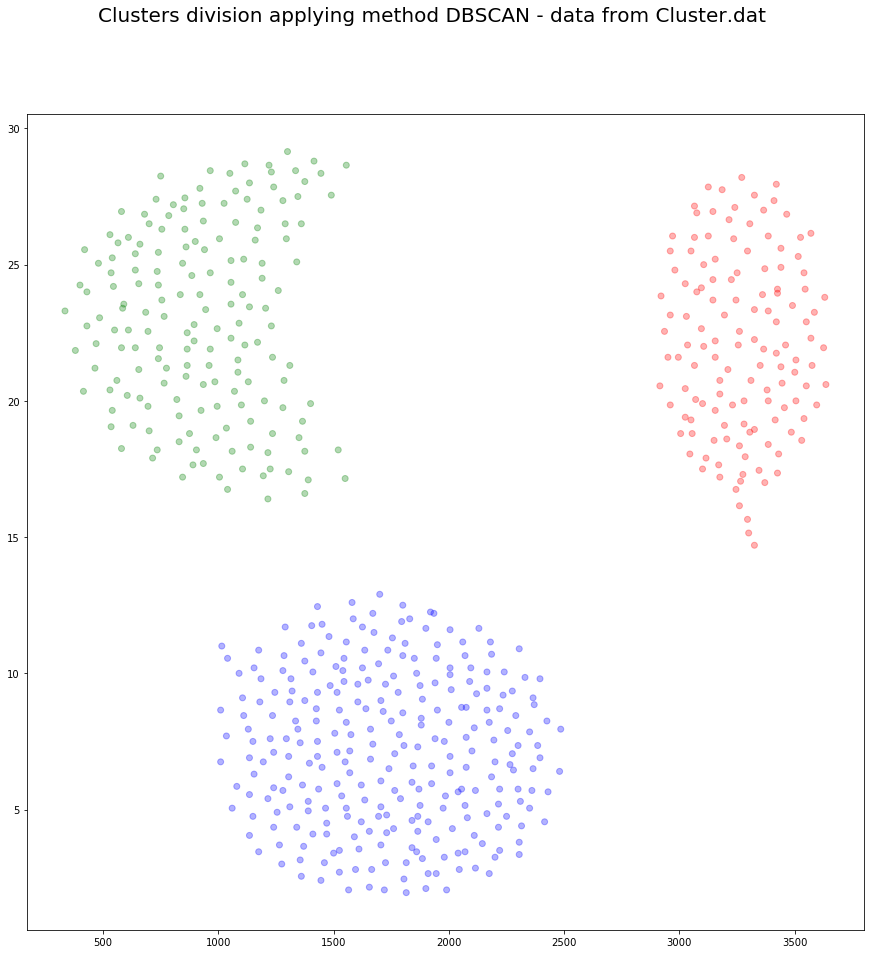

number of cluster found: 3
numbrer of outliers found: 0



In [110]:
callPlot(train,pointlabel,'Clusters division applying method DBSCAN (epsilon 0.1) - from cluster.dat')

cluster 0: []
cluster 1: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  25  20  21  23  24  26  27  28  29  30  22  31  32  33  34  35
  37  46  48  52  53  51  54 130 131 132  38  39  45  47  36  40  50  55
  56 125 128 129 133 134 144 145  49  41  43  44  59  42  57  58  60  61
  62  63  65  70  72  81 124  83 123 126 127 135 136 122 137 138 142 143
 146 147  71  82  84  96  64  66  67  68  73  69  79  80  85  97  98 120
 121 139 148  86  94  95  99 110 140 141 155 164 149 153 154 163  74  75
  77  93 100 101 111  92 102 113 150 152 151 156 162 159 161 160 165  76
  78  87  89  88  91  90 103 106 107 112 114 115 157 109 116 118 158 104
 108 117 119 169 167 166 168 105]
cluster 2: [170 171 172 173 174 175 176 177 178 179 180 181 182 183 190 191 192 193
 194 195 196 197 198 200 201 202 203 204 205 209 210 211 212 213 214 199
 206 207 208 215 216 226 227 230 189 217 221 222 223 224 228 229 233 235
 186 218 220 225 231 232 347 348 185 188 234 236 237 2

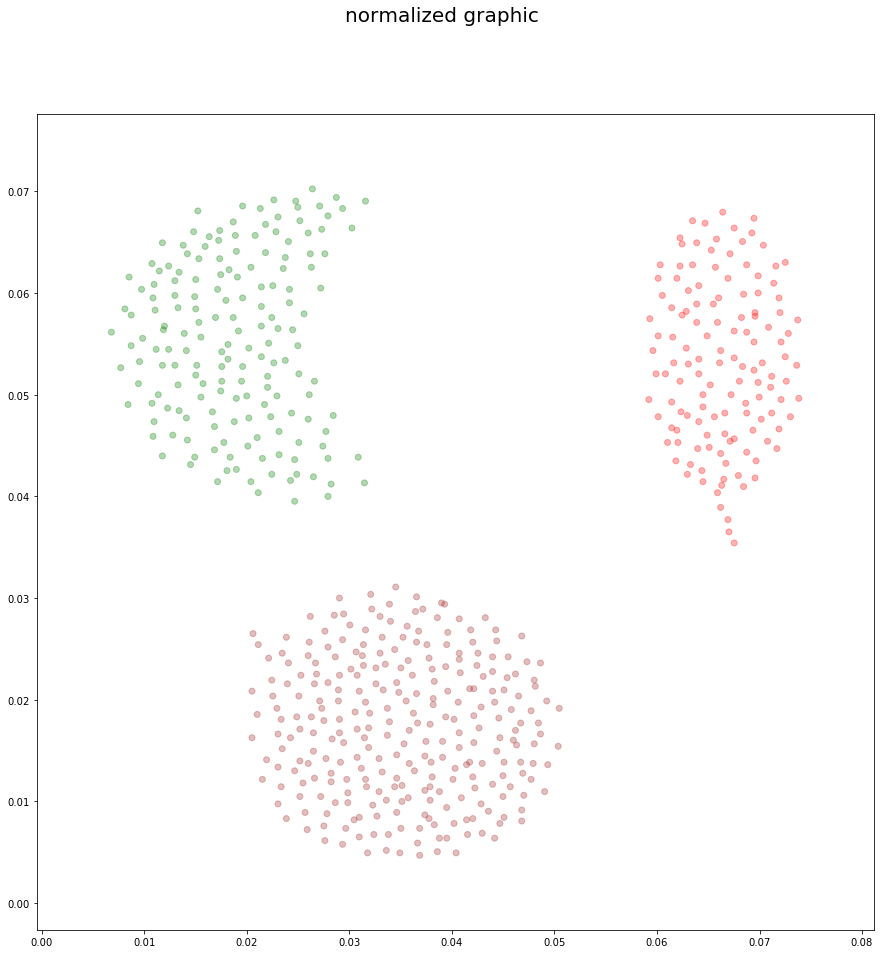

number of cluster found: 3
numbrer of outliers found: 0



In [101]:
callPlot(normTrain,pointlabel,'normalized graphic')

In [71]:
cl

0

In [66]:
pointlabel

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

573
3


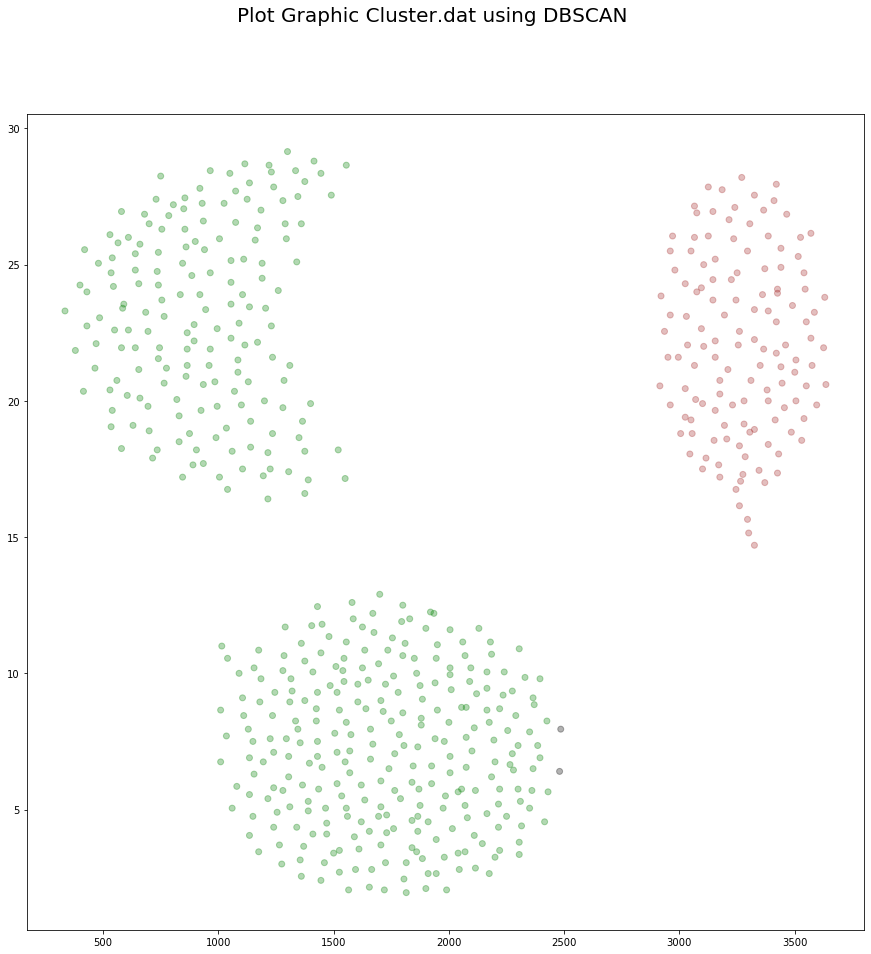

In [73]:
plotRes(train, pointlabel)